<a href="https://colab.research.google.com/github/Carlos-Ivan-Hernandez-Lopez/Simulacion-II/blob/main/Examen1/Problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instituto Politécnico Nacional 

Escuela superior de física y matemáticas

Simulación II

Primer examen parcial.

Carlos Iván Hernández López

# 25. Un quiosquero vende periódicos a 1.10 euros cada uno.
Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la siguiente tabla.

| Periódicos | 30 |  40 | 50 | 60 | 70 |
|-|-|-|-|-|-| 
| $f(x)$ | 20% | 25% | 25% | 20% | 10% |

La tabla recoge por ejemplo que el 20% del tiempo de las ventas ha sido de 30 periódicos teniendo en cuenta el costo de 0.20 euros por venta perdida y el coste de 0.10 por reciclaje de cada periodico no vendido, determine el veneficio promedio diario si pide 50 periódicos cada día.

## Solución por simulación.
Aplicando la metodologia de la simulación.

### Paso 1:Define las variables.
$x$: Describe la cantidad de periódicos vendidos en un día

### Paso 2 y 3: Defina la distribución de probabilidad y modele las variables aleatorias.
Por las condiciones mostradas en el problema la variable tiene la siguiente distribución.

$$x∼\begin{cases}30 & \text{20% de los casos}\\ 40 & \text{25% de los casos} \\ 50 & \text{25% de los casos} \\ 60 & \text{20% de los casos} \\ 70 & \text{10% de los casos} \end{cases}$$

### Paso 4:Defina el modelo del sistema y los objetivos de la simulación.
En este caso el modelo será el siguiente

$$U=\begin{cases} x*1.10-50*0.9-(50-x)*0.1 & \text{si $x\leq 50$}\\ 50*1.10-50*0.9-(x-50)*0.20 & \text{si $x>50$} \end{cases}$$

El objetivo de esta simulación es determinar el precio promedio de la estrategia de ventas.

In [45]:
# Se importan las librerias que usaremos.
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math 

In [7]:
def ventas():     #Esta función nos regresa el valor del veneficio diario el quiosquero.
  x=rd.random()   
  if x<1/5:        #Asigna el valor de 30 al 20% de las corridas.
    x=30
  else:
    if x<9/20:     #Asigna el valor de 40 al 25% de las corridas.
      x=40
    else:
      if x<7/10:   #Asigna el valor de 50 al 25% de las corridas.
        x=50
      else:
        if x<9/10: #Asigna el valor de 60 al 20% de las corridas.
          x=60
        else:
          if x<1:  #Asigna el valor de 70 al 10% de las corridas.
            x=70
  if x<=50:        #Se calcula el valor del veneficio dependiendo de x.
    u=x*1.1-50*0.9-(50-x)*0.1
  else:
    u=50*1.1-50*0.9-(x-50)*0.2
  return u

In [127]:
ventas()

-2.0

### Paso 5: Diseñe el experimento.
Para determinar el veneficio promeido diario correremos n veces el modelo y registraremos los valores obtenidos.

In [8]:
def veneficio(n): #Esta función devuelve una lista con los promedios de cada iteración
  v=0
  promedio=[]
  for i in range(n):
    v+=ventas()
    p=v/(i+1) 
    promedio.append(p)
  return promedio

1.5171739541915152 0.5836017675418058


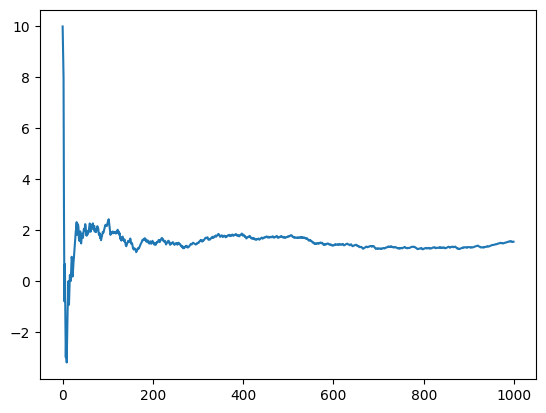

In [24]:
x=veneficio(1000) #Asignamos un valor a n en el cual vemos que se estabiliza el promedio por medio de la siguiente grafica.
plt.plot(x)
Media=np.mean(x) #Obtenemos la media y la desviación estándar de los datos generados.
DesEst=np.std(x)
print(Media,DesEst)

### Paso 6: Repita el experimento $N$ veces
Encontramos $N$ por medio del teorema central del limite.


In [46]:
N=math.ceil((2*DesEst*1.96/0.01)**2) #El teorema central del limite nos dara una aproximacion a la cantidad de reprticiones que se requieren para que el experimento
print(N)                  #regrese resultados confiables.

52337


Repetiremos el experimento 52337 veces por meido de

In [30]:
def rep(j):
  lista=[]
  for i in range(j):
    r=veneficio(1000)
    lista.append(np.mean(r))
  return lista

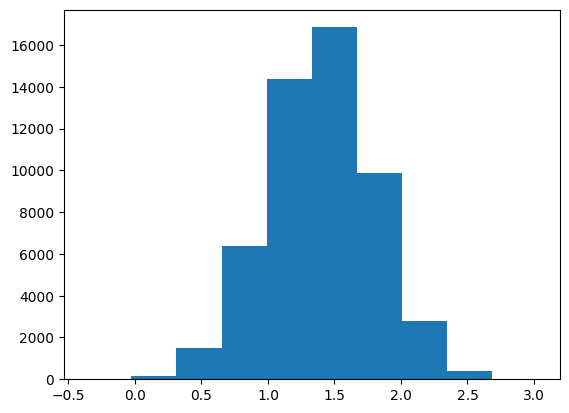

In [47]:
Y=rep(N)
plt.hist(Y)
plt.show()

In [48]:
X=np.mean(Y)
s=np.std(Y)
print(X,s)

1.3980159513981516 0.3975353319307778


### Paso 7. Obtener el intervalo de confianza.
Para obtener el intervalo de confianza usaremos
$$\bar{x}-z_{α/2}*s/\sqrt{n}<μ<\bar{x}+z_{α/2}*s/\sqrt{n}$$
con un nivel de confianza del 95%

In [49]:
li=X-(1.96*s/np.sqrt(N)) #Se calculan los limites con los parametros que tenemos.
ls=X+(1.96*s/np.sqrt(N))
print('El intervalo de confianza es:[', li, ',', ls, ']')

El intervalo de confianza es:[ 1.3946100866884072 , 1.401421816107896 ]


## Solución analitica
Primero calcularemos las prosibles utilidades que puede tener el quiosquero en cada caso.

$$U=\begin{cases}30*1.1-50*0.9-(50-30)*0.1=-14 & p=0.20 \\ 40*1.1-50*0.9-(50-40)*0.1=-2 & p=0.25 \\ 50*1.1-50*0.9-(50-50)*0.1=10 & p=0.25 \\50*1.1-50*0.9-(60-50)*0.2=8 & p=0.20\\50*1.1-50*0.9-(70-50)*0.2=6 & p=0.10 \end{cases}$$

Obtenemos el veneficio promedio multiplicando las utilidades por la probabilidad de obtenerlas.

$$Veneficio=-14(0.20)-2(0.25)+10(0.25)+8(0.20)+6(0.10)$$
$$Veneficio=1.4$$

El veneficio promedio del quiosquero es de 1.4 euros.

## Determine, por simulación, el pedido de periódicos que optimiza el veneficio.
Modificamos el modelo para evaluar diferentes pedidos.

In [52]:
def utilidad(Oferta): #Esta función nos regresa el valor del veneficio diario el quiosquero.
  x=rd.random()   
  if x<1/5:        #Asigna el valor de 30 al 20% de las corridas.
    x=30
  else:
    if x<9/20:     #Asigna el valor de 40 al 25% de las corridas.
      x=40
    else:
      if x<7/10:   #Asigna el valor de 50 al 25% de las corridas.
        x=50
      else:
        if x<9/10: #Asigna el valor de 60 al 20% de las corridas.
          x=60
        else:
          if x<1:  #Asigna el valor de 70 al 10% de las corridas.
            x=70
  if x<=Oferta:        #Se calcula el valor del veneficio dependiendo de x.
    u=x*1.1-Oferta*0.9-(Oferta-x)*0.1
  else:
    u=Oferta*1.1-Oferta*0.9-(x-Oferta)*0.2
  return u

El peido de periódicos que optimiza el veneficio es:  40 , con un veneficio de:  3.9034638055169966 Euros.


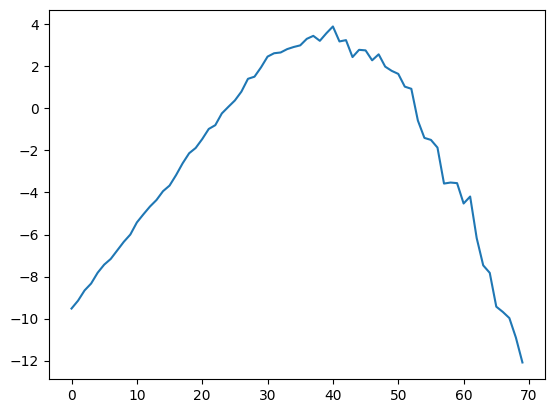

In [96]:
esperado=[]            #Con este programa se determina el pedido que optimiza el veneficio del quiosquero
for i in range(0,70):
  v=0
  prom=[]
  for j in range(1000):
    v+=utilidad(i)
    prom.append(v/(j+1))
  p=np.mean(prom)
  esperado.append(p)   #'esperado' es una lista que guarda el promedio de 1000 promeidos por corrida. 
plt.plot(esperado)
max=np.max(esperado)   #El valor maximo de 'esperado' es el valor que optimiza la utilidad.
for i in range(len(esperado)): #Recorremos todo el vector 'esperado' para encontrar el pedido que optimiza el veneficio.
  if max==esperado[i]:
    print('El peido de periódicos que optimiza el veneficio es: ',i,', con un veneficio de: ',max, 'Euros.')